# Time Series on Financial Applications  
### Section 1: plot the time series

Load the Dow Jones Industrial Average (DJIA) from djia.csv.Focus on the Close value of the index ('Close' column):

(a) Plot the Close index versus time. Add title "The Dow Jones Industrial Average (DJIA) from April 20, 2006 to April 20, 2016," x-label "Time," and y-label "DJIA."   
Does the time series appear to be stationary? Please justify.

(b) Compute daily returns that are based on the close DJIA. Use .diff(). The normal practice is to approximate it with $r_{t}=\ln(x_t)-\ln(x_{t-1})$. Plot the return similarly to (a) changing the title to "The daily returns of the Dow Jones Industrial Average (DJIA) from April 20, 2006 to April 20, 2016" and y-label to "DJIA Returns." Does the time series of the daily returns appear to be stationary? Please justify.

(c) Find and plot ACF of the Close index.

## Solutions

(a)

In [8]:
# load the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import acf, pacf

In [9]:
df = pd.read_csv('djia.csv', parse_dates=['date'], index_col='date')  # load the data and we call the data as "df"
df

,Open,High,Low,Close,Volume
date,,,,,
2006-04-20,11278.53027,11384.11035,11275.04981,11342.88965,336420000.0
2006-04-21,11343.45020,11405.87988,11316.79004,11347.45020,325090000.0
2006-04-24,11346.80957,11359.70020,11305.83008,11336.32031,232000000.0
2006-04-25,11336.55957,11355.37012,11260.83984,11283.25000,289230000.0
2006-04-26,11283.25000,11379.87012,11282.76953,11354.49023,270270000.0
...,...,...,...,...,...
2016-04-14,17912.25000,17962.14063,17885.43945,17926.42969,84510000.0
2016-04-15,17925.94922,17937.65039,17867.41016,17897.46094,118160000.0
2016-04-18,17890.19922,18009.52930,17848.22070,18004.16016,89390000.0


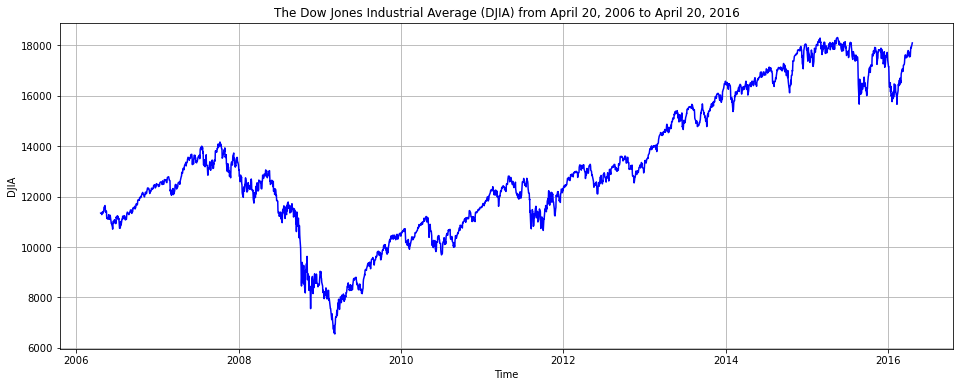

In [10]:
close = df["Close"]
plt.figure(figsize=(16,6))
plt.plot(close, linestyle='-', color='b')
plt.xlabel('Time')
plt.ylabel('DJIA')
plt.title('The Dow Jones Industrial Average (DJIA) from April 20, 2006 to April 20, 2016')
plt.grid(True)
plt.show()

It is not stationary as the mean is increasing.

(b)

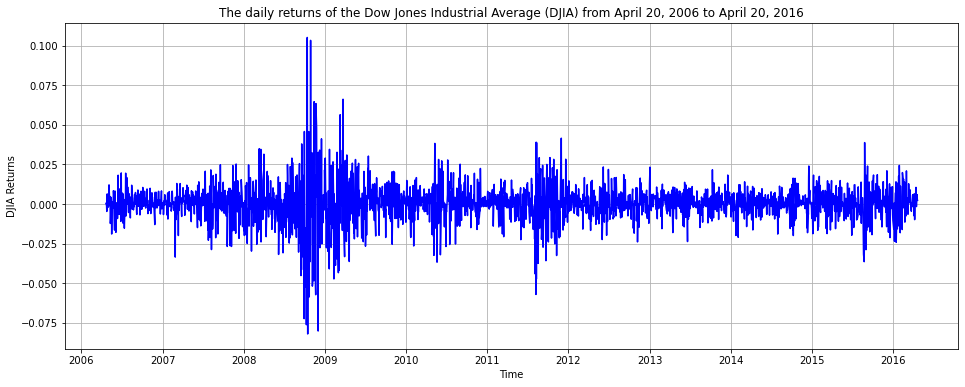

In [11]:
ln_close = np.log(close)
r = ln_close.diff(1)   # take the first difference
plt.figure(figsize=(16,6))
plt.plot(r, linestyle='-', color='b')
plt.xlabel('Time')
plt.ylabel('DJIA Returns')
plt.title('The daily returns of the Dow Jones Industrial Average (DJIA) from April 20, 2006 to April 20, 2016')
plt.grid(True)
plt.show()

It is stationary as the mean is constant around zero.

(c)

[1.         0.99805115 0.99631203 0.99466887 0.99297012 0.99133168
 0.9898111  0.98836342 0.98696913 0.98552382 0.98411409 0.98260049
 0.98113428 0.97954247 0.97791737 0.97639406 0.97499897 0.97350032
 0.97199229 0.97061691 0.96920583 0.96766363 0.96619788 0.96467733
 0.96316061 0.96167279 0.96025511 0.95888354 0.95742464 0.95610393
 0.95477561 0.95343967 0.95211762 0.95080895 0.94950031 0.94831236
 0.94712291 0.94591743 0.94469661 0.94347325 0.94227571]


<function matplotlib.pyplot.show(close=None, block=None)>

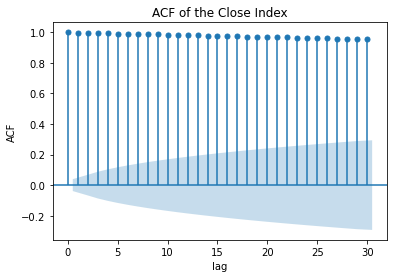

In [12]:
result = acf(close)
print(result)


plot_acf(close,lags = 30)
plt.xlabel("lag")
plt.ylabel("ACF")
plt.title("ACF of the Close Index")
plt.show